In [1]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'ba_example'
sr, signal = scipy.io.wavfile.read('../data/{}.wav'.format(filename))

In [3]:
f, t, Sxx = scipy.signal.spectrogram(signal, sr)

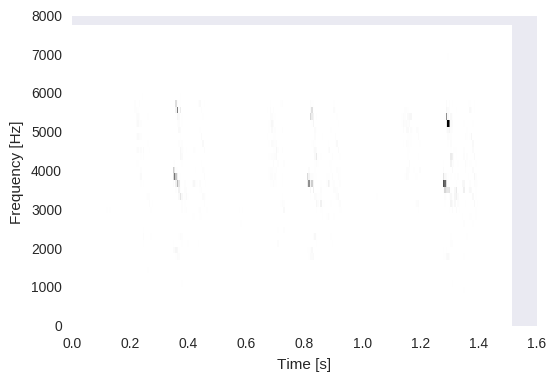

In [4]:
upbound = np.max(np.where(f < 8000)[0])
plt.pcolormesh(t, f[:upbound], Sxx[:upbound, ...])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')